<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
from scipy.stats import pearsonr

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

<function matplotlib.pyplot.show(*args, **kw)>

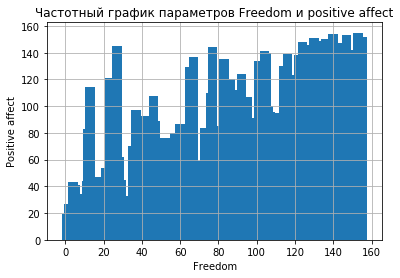

In [4]:
x = df['Freedom']
y = df['Positive affect']

plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Частотный график параметров Freedom и positive affect')
plt.grid(True)
plt.bar(x, y, width = 5)
plt.show

### Равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [26]:
print("mean", df[['Freedom', 'Positive affect']].mean(), sep="\n")
print("std", df[['Freedom', 'Positive affect']].std(), sep="\n")
print("var", df[['Freedom', 'Positive affect']].var(), sep="\n")
print("min", df[['Freedom', 'Positive affect']].min(), sep="\n")
print("max", df[['Freedom', 'Positive affect']].max(), sep="\n")

q1 = df['Freedom'].quantile(0.25)
q3 = df['Freedom'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(f"выбросы для Freedom {df.loc[(df['Freedom']<=lower_bound)|(df['Freedom']>=upper_bound)]['Freedom']}")

q1pa = df['Freedom'].quantile(0.25)
q3pa = df['Freedom'].quantile(0.75)
iqrpa = q3pa - q1pa
lower_bound_pa = q1pa - (1.5 * iqrpa) 
upper_bound_pa = q3pa + (1.5 * iqrpa)
print(f"выбросы для Freedom {df.loc[(df['Positive affect']<=lower_bound_pa)|(df['Positive affect']>=upper_bound_pa)]['Positive affect']}")

print("Размах", df[['Freedom']].max()-df[['Freedom']].min(), sep="\n")

mean
Freedom            78.0
Positive affect    78.0
dtype: float64
std
Freedom            44.888751
Positive affect    44.888751
dtype: float64
var
Freedom            2015.0
Positive affect    2015.0
dtype: float64
min
Freedom            1.0
Positive affect    1.0
dtype: float64
max
Freedom            155.0
Positive affect    155.0
dtype: float64
выбросы для Freedom Series([], Name: Freedom, dtype: float64)
выбросы для Freedom Series([], Name: Positive affect, dtype: float64)
Размах
Freedom    154.0
dtype: float64


Почему нельзя найти моду?

In [28]:
df["Freedom"].mode()

#Потому что все элементы являются уникальными

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
150    151.0
151    152.0
152    153.0
153    154.0
154    155.0
Length: 155, dtype: float64

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

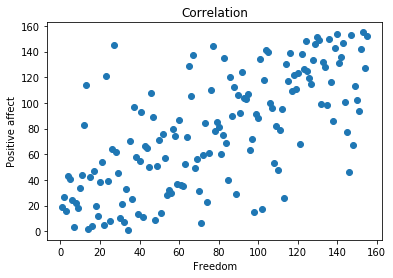

In [74]:
x = np.array(df['Freedom'])
y = np.array(df['Positive affect'])
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Correlation')
plt.scatter(x, y)

In [83]:
print(df[['Freedom', 'Positive affect']].corr()) #Зависимость Freedom и Positive affect средняя 
# знак показывает прямую или обратную зависимость, в данном случае имеют прямую зависимость

float(df[['Freedom', 'Positive affect']].corr().iloc[:-1,-1]) 
#либо можно так, не стал париться с from scipy.stats import pearsonr, т.к. надо избавиться от NaN

                 Freedom  Positive affect
Freedom          1.00000          0.68177
Positive affect  0.68177          1.00000


0.6817698430601656

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [106]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(np.array(df['Freedom']).reshape(-1, 1))
df_norm = pd.DataFrame(np_scaled)
df_norm.head()
print(df_norm.min())
print(df_norm.max())
print(df_norm.mean())

0   -1.0
dtype: float64
0    1.0
dtype: float64
0    2.034215e-16
dtype: float64


Построить матрицу корреляций для всех колонок таблицы

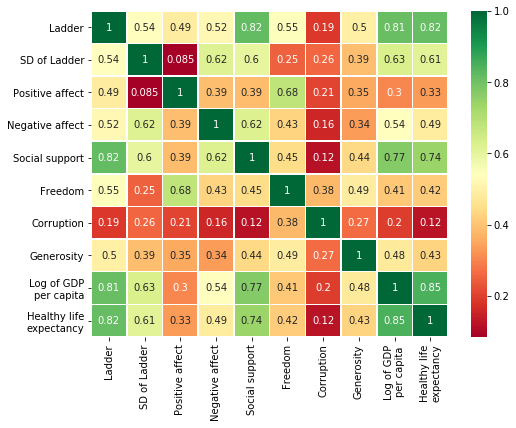

In [95]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Загрузить таблицу цен на авокадо: 

In [113]:
avacado_price = pd.read_csv('avocado.csv')
avacado_price[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [132]:
avacado_price['AveragePrice'].max()

3.25

Сделать частотный график колонки AveragePrice. Какое это распределение?

<BarContainer object of 18249 artists>

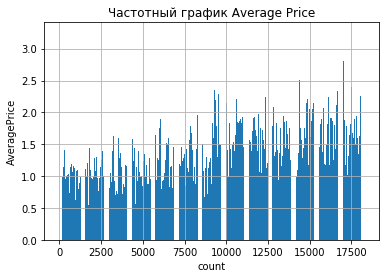

In [149]:
x = np.array(range(len(avacado_price['AveragePrice'])))
y = avacado_price['AveragePrice']
plt.xlabel('count')
plt.ylabel('AveragePrice')
plt.title('Частотный график Average Price')
plt.grid(True)
plt.bar(x, y)

### Равномерное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [136]:
avacado_price[['4046', '4225', '4770', 'AveragePrice']].corr()

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


Наблюдается сильная прямая корреляция у параметров 4046 и 4225, значит изменение цен одного параметра оказывает такое же влияние на другой параметр.